In [22]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [23]:
#マスーばねーダンパシステムの定義
M = 1.0
D = 5.0
K = 6.0
A = np.array([[0.0, 1.0], [-K/M, -D/M]]) #行列A
b = np.array([[0.0], [1/M]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [24]:
#拡大システム(13.32)式の構成
A12 = np.array([[0.0],[0.0]])
A21 = np.array([[-1.0, 0.0]])
A22 = np.array([[0.0]])
AE11 = np.concatenate((A, A12), axis=1)
AE21 = np.concatenate((-c,A22), axis=1)

AE = np.concatenate((AE11,AE21), axis=0)

bE21 = np.array([[0.0]])
bE = np.concatenate((b,bE21), axis=0)

In [25]:
#閉ループシステムの極の指定
poles = [-3.0, -3.0, -3.0]
fE = matlab.acker(AE, bE, poles)#状態フィードバックベクトルを求める
print("feedback gain =", fE)

feedback gain = [[ 21.   4. -27.]]


In [26]:
#(13.35)式のf*とg*を求める
ff = np.concatenate((fE[:,0],fE[:,1]), axis=1) #f*
fg = fE[:,2] #g*

In [27]:
# (13.36)式の閉ループシステムの状態空間表現
AEc11 = A - b*ff
AEc12 = b*(-fg)
AEc21 = -c
AEc22 = np.array([[0.0]])
AEcc11 = np.concatenate((AEc11, AEc12), axis=1)
AEcc21 = np.concatenate((AEc21,AEc22), axis=1)
bEc21 = np.array([[1.0]]) #(13.36)式のr(t)の部分

AEc = np.concatenate((AEcc11,AEcc21), axis=0)
bEc = np.concatenate((b,bEc21), axis=0)
cEc = np.array([[1.0, 0.0, 0.0],[0.0,1.0, 0.0]])#x_{1}とx_{2}をプロットするためにCを単位行列にする
dEc = np.array([[0.0],[0.0]])#Cに合わせてDは零ベクトルとする

sysE_s_c = matlab.ss(AEc, bEc, cEc, dEc) #(12.36)式の状態空間表現を求める
(y_Es_c, t_Es_c) = matlab.step(sysE_s_c, T = arange(0, 5, 0.01), X0 = np.array([[-1.0],[0.0],[0.0]])) #初期条件を与えてステップ応答を計算

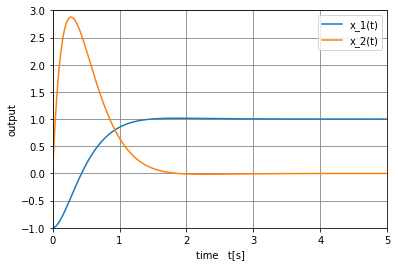

In [28]:
# 図13.15の描画
plt.plot(t_Es_c, y_Es_c[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_Es_c, y_Es_c[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.0, 3.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示